In [334]:
import pandas as pd
import numpy as np

data=pd.read_csv('mnist_train.csv')


x=data.drop(data.columns[0], axis=1)
y=data[data.columns[0]]
X_train = np.array(x.values)
Y_train = np.array(y.values)
X_train=X_train[:500]
Y_train=Y_train[:500]
Y_train.reshape(500,1)

array([[0],
       [4],
       [1],
       [9],
       [2],
       [1],
       [3],
       [1],
       [4],
       [3],
       [5],
       [3],
       [6],
       [1],
       [7],
       [2],
       [8],
       [6],
       [9],
       [4],
       [0],
       [9],
       [1],
       [1],
       [2],
       [4],
       [3],
       [2],
       [7],
       [3],
       [8],
       [6],
       [9],
       [0],
       [5],
       [6],
       [0],
       [7],
       [6],
       [1],
       [8],
       [7],
       [9],
       [3],
       [9],
       [8],
       [5],
       [9],
       [3],
       [3],
       [0],
       [7],
       [4],
       [9],
       [8],
       [0],
       [9],
       [4],
       [1],
       [4],
       [4],
       [6],
       [0],
       [4],
       [5],
       [6],
       [1],
       [0],
       [0],
       [1],
       [7],
       [1],
       [6],
       [3],
       [0],
       [2],
       [1],
       [1],
       [7],
       [9],
       [0],
       [2],
       [6],
    

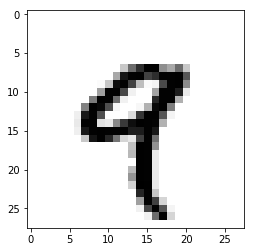

In [282]:
j=np.array(X_train[3]).reshape(28,28)
from matplotlib import pyplot as plt
plt.imshow(j,cmap='gray_r')
plt.show()

In [283]:
def conv_single_step(a_slice_prev, W):
    s = W * a_slice_prev 
    Z = np.sum(s)
    return Z

In [284]:
def zero_pad(x,p):
    res=np.pad(x, ((p,p),(p,p)), 'constant', constant_values=0)
    return res
    

In [285]:
def convolution2d(img, f1,p,s):
    m, n = f1.shape
    a, b = img.shape
    r=((a-m+2*p)/s)+1
    c=((b-n+2*p)/s)+1
    #print "before padding :",data.shape
    data=zero_pad(img,p)
    #print "after padding :",data.shape
    res=np.zeros(shape=(r,c))
    for i in range(r):
        for j in range(c):
            x=i+m
            y=j+n
            a_slice_prev=img[i:x,j:y]
            res[i][j]= conv_single_step(a_slice_prev,f1)
    return res

In [286]:
def ReLu(z):
    y=np.maximum(0,z)
    return y

In [287]:
def convolution_data(X_train,f1,pad,stride):
    n=X_train.shape[0]
    res=[]
    for i in range(n):
        j=np.array(X_train[i]).reshape(28,28)
        c_j=convolution2d(j,f1,pad,stride)
        c_j=np.ravel(c_j)
        res.append(c_j)
    res=np.array(res)
    return res
        
        

In [288]:
def softmax(X):
    exps = np.exp(X - np.max(X))
    return exps / np.sum(exps)


In [289]:
def fc(x,W,b):
    res=np.dot(W,x)+b
    #res=res/1000
    return res
    
    

In [290]:
def forward_prop(X_train,Y_train,f1,pad,stride,W,b):
    #print "initial input shape",X_train.shape
    cnvld_x=convolution_data(X_train,f1,pad,stride)
    #print "shape after convolution ",cnvld_x.shape
    #print "convolved_x",cnvld_x
    #print "convld_x",np.unique(cnvld_x)
    relu_x=ReLu(cnvld_x)
    #print "shape after relu",relu_x.shape
    relu_x=relu_x.T
    #print "shape after relu transpose",relu_x.shape
    #W=np.random.randint(5,size=(10,relu_x.shape[0]))
    #b=np.random.randint(1,size=(10,relu_x.shape[1]))
    
  
    #print "shape of w",W.shape
    #print "shape of b",b.shape
    output=fc(relu_x,W,b)
    #print "shape of output", output.shape
    prob=softmax(output)
    #prob=prob.max(axis=0)
    #print "shape ofy_prob", prob.shape
    loss=calculate_loss(Y_train,prob)
    cache=(X_train,cnvld_x,relu_x,output,prob,f1,W,b)
    
    return cache,loss
    
    

In [291]:
def calculate_loss(y,y_prob):
    loss_train=0
    y=y.reshape(y.shape[0],1)
    y_prob=y_prob.T
    m = y.shape[0]
    for i in np.arange(m):
        loss_train = loss_train+(np.log(y_prob[i,y[i]]))
    loss_train = loss_train/m
    return -1*loss_train

In [292]:
#dl/da2=da2
def der_loss(a2,y):
    return np.divide(y,a2)

In [293]:
#da2/dz2=dz2
def der_act2(a2):
    return np.multiply(a2,np.subtract(1,a2))

In [294]:
#dz2/da1=da1
def der_z2(W2,z2):
    return W2

In [295]:
#derivative of relu
def der_a1(z1):
    return z1*(z1>0)
    

In [296]:
def func(X,W):
    m,n=X.shape
    a,b=W.shape
    r=m-a+1
    c=n-b+1
    #res=np.zeros(shape=(a*2,a*2))
    res=np.ndarray(shape=(r,c),dtype=type(np.zeros([a,b])))
    #res = np.empty(shape=(r,c))
    
    #print m,n,a,b,r,c
    for i in range(r):
        for j in range(c):
            e_r=i+a
            e_c=j+b
            temp=X[i:e_r,j:e_c]
            res[i][j]=temp
    dw1_temp=np.zeros([3,3])
    #print "res",res[0]
    for i in range(res.shape[1]):
        for k in range(res.shape[0]):
            dw1_temp=dw1_temp+res[i][k]
    
    
    return dw1_temp
            
        

In [310]:
def backward_prop(cache,y,alpha):
    X,z1,a1,z2,a2,W1,W2,b=cache
    
    
    #print "shape of z1",z1.shape
    
    #dl/da2=da2(just the notation)
    da2=der_loss(a2,y)
    
    #da2/dz2=dz2
    da2_by_dz2=der_act2(a2)
    
      
    #dl/dw=dw (for updating the weights)
    #print "shape of da2",da2.shape
    #print "shape of da2_by_dz2",da2_by_dz2.shape
    #print "shape of a1", a1.shape
    dz2=np.multiply(da2,da2_by_dz2)
    dW2=np.dot(dz2,a1.T)/X.shape[0]
    #print "shape of dw2",dW2.shape
    #print "shape of dz2",dz2.shape
    
    #dl/db=db
    db=np.sum(da2*da2_by_dz2,axis=1,keepdims=True)/X.shape[0]
    
    #print "shape of db",db.shape
    
    
    
    #calculating dw1
    #dz2/da1=da1
    dz2_by_da1=der_z2(W2,z2)
    #print "shape of dz2_by_da1",dz2_by_da1.shape
    #print "unique values dz2_by_da1",np.unique(dz2_by_da1)
    #print "unique values of dz2", np.unique(dz2)

    da1_by_dz1=der_a1(z1)
    #print "shape of da1_by_dz1",da1_by_dz1.shape
    
    
    
    #dz1/dw1
    dz1_by_dw1=X
    #print "shape of dz1_by_dw1",dz1_by_dw1.shape
    #dl/dw1
    #dw1=np.dot(dz2.T,dz2_by_da1)*da1_by_dz1
    dw1_temp=np.dot(dz2.T,dz2_by_da1)
    #print "shape of dw1",dw1.shape
    #print "unique values",np.unique(dw1)
    res_updated_filter=np.zeros([3,3])
    for i in range(X.shape[0]):
        res_updated_filter=res_updated_filter+func(dw1_temp[i].reshape(26,26),W1)
        
            
    #print "unique values in res_updated filet",np.unique(res_updated_filter)
    dw1=res_updated_filter
   
    W1=W1-alpha*dw1
    W2=W2=alpha*dW2
    b=b-alpha*db
    return W1,W2,b
    
    
    

In [332]:
W1=np.random.normal(0,.1,(3,3))
W2=np.random.normal(0,.1,(10,676))
b=np.random.normal(0,.1,(10,X_train.shape[0]))
alpha=0.000001
loss_function=[]
for i in range(20):
    cache,loss=forward_prop(X_train,Y_train,W1,0,1,W2,b)
    print "loss",loss
    W1,W2,b=backward_prop(cache,Y_train,alpha)

      
    

loss [104.96716398]
loss [8.52352654]
loss [8.52694378]
loss [8.52670998]
loss [8.52641644]
loss [8.52614442]
loss [8.5258936]
loss [8.52566238]
loss [8.52544923]
loss [8.52525266]
loss [8.52507132]
loss [8.52490411]
loss [8.52474973]
loss [8.52460728]
loss [8.52447578]
loss [8.52435461]
loss [8.52424293]
loss [8.52413975]
loss [8.52404446]
loss [8.52395656]


In [336]:
def pred_y(X_test,y_test,W1,W2,b):
        
    cnvld_x=convolution_data(X_train,W1,0,1)
   
    relu_x=ReLu(cnvld_x)
    
    relu_x=relu_x.T
    
    output=fc(relu_x,W2,b)
    
    prob=softmax(output)
    row_index = np.argmax(prob, axis=0)
    count=0
    for i in range(X_test.shape[0]):
        if row_index[i]==y_test[i]:
            count+=1
    acc=float(count)/250
            
    return acc
    

In [330]:
data=pd.read_csv('mnist_test.csv')
x=data.drop(data.columns[0], axis=1)
y=data[data.columns[0]]
X_test = np.array(x.values)
Y_test = np.array(y.values)
X_test=X_train[:500]
Y_test=Y_train[:500]
Y_test=Y_test.reshape(500,1)
print "reshape ",Y_test.shape

reshape  (500, 1)


In [339]:
acc=pred_y(X_test,Y_test,W1,W2,b)
print "accuracy",acc

accuracy 0.192
